In [34]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff

from tqdm import tqdm, trange

In [35]:
def function_data_historical(df):
  df = df[df['SITUACION_MATRICULA']==1]
  df = df[['SEMESTRE',
                        'ID',
                        'COD_ESTUDIANTE',
                        'ESCUELA_PROFESIONAL',
                        'CANT_CURSO_MAT_CICLO_01', 'CANT_CURSO_MAT_CICLO_02', 'CANT_CURSO_MAT_CICLO_03',
                        'CANT_CURSO_MAT_CICLO_04', 'CANT_CURSO_MAT_CICLO_05', 'CANT_CURSO_MAT_CICLO_06',
                        'CANT_CURSO_MAT_CICLO_07', 'CANT_CURSO_MAT_CICLO_08', 'CANT_CURSO_MAT_CICLO_09',
                        'CANT_CURSO_MAT_CICLO_10', 'CANT_CURSO_MAT_CICLO_11', 'CANT_CURSO_MAT_CICLO_12',
                        'CANT_CURSO_MAT_CICLO_13', 'CANT_CURSO_MAT_CICLO_14',
                        'CANT_CURSO_MAT_DES_CICLO_01', 'CANT_CURSO_MAT_DES_CICLO_02', 'CANT_CURSO_MAT_DES_CICLO_03',
                        'CANT_CURSO_MAT_DES_CICLO_04', 'CANT_CURSO_MAT_DES_CICLO_05', 'CANT_CURSO_MAT_DES_CICLO_06',
                        'CANT_CURSO_MAT_DES_CICLO_07', 'CANT_CURSO_MAT_DES_CICLO_08', 'CANT_CURSO_MAT_DES_CICLO_09',
                        'CANT_CURSO_MAT_DES_CICLO_10', 'CANT_CURSO_MAT_DES_CICLO_11', 'CANT_CURSO_MAT_DES_CICLO_12',
                        'CANT_CURSO_MAT_DES_CICLO_13', 'CANT_CURSO_MAT_DES_CICLO_14'
                        ]]
  df = df.reset_index(drop=True)

  df = df.groupby(['ID']).agg(
                #        NUM_MATRICULAS=('SEMESTRE','count'),
                        COD_ESTUDIANTE=('COD_ESTUDIANTE','max'),
                        ESCUELA_PROFESIONAL=('ESCUELA_PROFESIONAL','max'),
                        NUM_CURSOS_APR_CICLO_01=('CANT_CURSO_MAT_CICLO_01','sum'),
                        NUM_CURSOS_APR_CICLO_02=('CANT_CURSO_MAT_CICLO_02','sum'),
                        NUM_CURSOS_APR_CICLO_03=('CANT_CURSO_MAT_CICLO_03','sum'),
                        NUM_CURSOS_APR_CICLO_04=('CANT_CURSO_MAT_CICLO_04','sum'),
                        NUM_CURSOS_APR_CICLO_05=('CANT_CURSO_MAT_CICLO_05','sum'),
                        NUM_CURSOS_APR_CICLO_06=('CANT_CURSO_MAT_CICLO_06','sum'),
                        NUM_CURSOS_APR_CICLO_07=('CANT_CURSO_MAT_CICLO_07','sum'),
                        NUM_CURSOS_APR_CICLO_08=('CANT_CURSO_MAT_CICLO_08','sum'),
                        NUM_CURSOS_APR_CICLO_09=('CANT_CURSO_MAT_CICLO_09','sum'),
                        NUM_CURSOS_APR_CICLO_10=('CANT_CURSO_MAT_CICLO_10','sum'),
                        NUM_CURSOS_APR_CICLO_11=('CANT_CURSO_MAT_CICLO_11','sum'),
                        NUM_CURSOS_APR_CICLO_12=('CANT_CURSO_MAT_CICLO_12','sum'),
                        NUM_CURSOS_APR_CICLO_13=('CANT_CURSO_MAT_CICLO_13','sum'),
                        NUM_CURSOS_APR_CICLO_14=('CANT_CURSO_MAT_CICLO_14','sum'),
                #         NUM_CURSOS_DES_CICLO_01=('CANT_CURSO_MAT_DES_CICLO_01','sum'),
                #         NUM_CURSOS_DES_CICLO_02=('CANT_CURSO_MAT_DES_CICLO_02','sum'),
                #         NUM_CURSOS_DES_CICLO_03=('CANT_CURSO_MAT_DES_CICLO_03','sum'),
                #         NUM_CURSOS_DES_CICLO_04=('CANT_CURSO_MAT_DES_CICLO_04','sum'),
                #         NUM_CURSOS_DES_CICLO_05=('CANT_CURSO_MAT_DES_CICLO_05','sum'),
                #         NUM_CURSOS_DES_CICLO_06=('CANT_CURSO_MAT_DES_CICLO_06','sum'),
                #         NUM_CURSOS_DES_CICLO_07=('CANT_CURSO_MAT_DES_CICLO_07','sum'),
                #         NUM_CURSOS_DES_CICLO_08=('CANT_CURSO_MAT_DES_CICLO_08','sum'),
                #         NUM_CURSOS_DES_CICLO_09=('CANT_CURSO_MAT_DES_CICLO_09','sum'),
                #         NUM_CURSOS_DES_CICLO_10=('CANT_CURSO_MAT_DES_CICLO_10','sum'),
                #         NUM_CURSOS_DES_CICLO_11=('CANT_CURSO_MAT_DES_CICLO_11','sum'),
                #         NUM_CURSOS_DES_CICLO_12=('CANT_CURSO_MAT_DES_CICLO_12','sum'),
                #         NUM_CURSOS_DES_CICLO_13=('CANT_CURSO_MAT_DES_CICLO_13','sum'),
                #         NUM_CURSOS_DES_CICLO_14=('CANT_CURSO_MAT_DES_CICLO_14','sum'),
      ).sort_values(by=['COD_ESTUDIANTE'], ascending=False)

  df = df.reset_index(drop=False)
  return df

### Preparación de archivo

Este código en Python utiliza las bibliotecas Pandas y Pickle para trabajar con un archivo de Excel y guardarlo en un archivo de formato pickle.

 - La primera línea establece una variable "file" que contiene la ruta al archivo "DataSet_Tesis_COMPLETO_descompress.xlsx".
 - La segunda línea utiliza el método "read_excel" de pandas para leer el archivo de excel especificado en la variable "file" y almacenar los datos en una variable llamada "data".
 - La tercera línea utiliza el método "to_pickle" de pandas para guardar los datos en un archivo llamado "DataSet_Tesis.pkl" en formato pickle.
 - La cuarta línea utiliza el método "read_pickle" de pandas para cargar los datos del archivo pickle "DataSet_Tesis.pkl" en una variable llamada "data".
 
 
En resumen este código esta leyendo un archivo excel, guardando esa información en un archivo pickle y luego cargando nuevamente esa información desde ese archivo pickle.


In [36]:
file = 'data/DataSet_Tesis_COMPLETO_descompress.xlsx'
data = pd.read_excel(file)
data.to_pickle('data/DataSet_Tesis.pkl')
data = pd.read_pickle('data/DataSet_Tesis.pkl')

In [37]:
import hashlib

data['ID'] = data['COD_ESTUDIANTE'] + data['ESCUELA_PROFESIONAL']
data['ID'] = data['ID'].apply(lambda x: hashlib.sha256(x.encode('utf-8')).hexdigest())
print('Record number:',len(data))

# Eliminamos los ciclos de verano
data = data[~data['SEMESTRE'].str.contains('C|O')]
print('New record number:',len(data))

Record number: 812720
New record number: 797769


##### Lista de alumnos

In [38]:
# Lista de alumnos
alumnos_lista = list(set(data['ID']))
print('Number of students:',len(alumnos_lista))

Number of students: 52926


##### Eliminar datos de alumnos que están incompletos

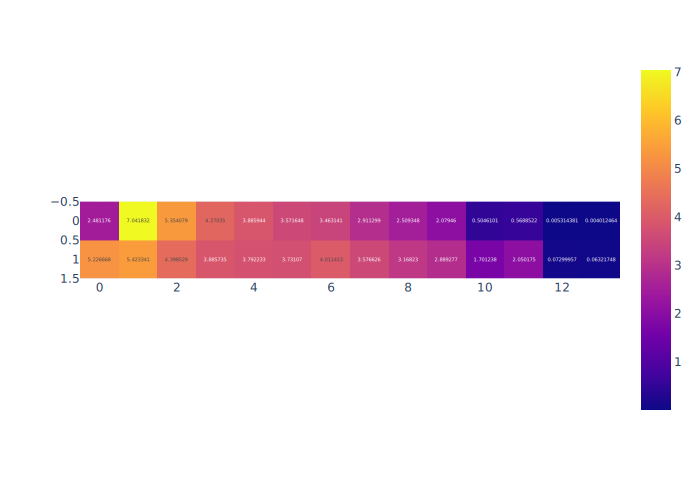

In [39]:
# Data historial del Alumno (evolutivo)
data_historial =  function_data_historical(data)
data_historial.head()

data_img =  data_historial.describe().iloc[1:3,:].values
fig = px.imshow(data_img, text_auto=True)
# fig.show()

fig.show(renderer="svg")

In [40]:
# Eliminamos Alumnos cuya activIDad se registro despues del primer ciclo (son datos sin detalle previo)
alumno_eliminar = data_historial[data_historial['NUM_CURSOS_APR_CICLO_01']==0]['ID'].values
print('Alumnos a eliminar (no se registra sus primeros ciclos): '+str(len(alumno_eliminar)))
data = data[~data['ID'].isin(alumno_eliminar)].reset_index(drop=True)

print('New record number:',len(data))

Alumnos a eliminar (no se registra sus primeros ciclos): 26107
New record number: 393306


20747


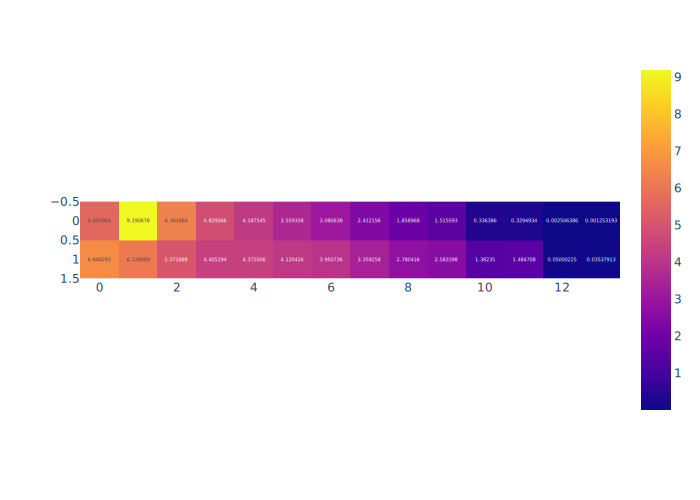

In [41]:
# Reconstruimos data historical
data_historial =  function_data_historical(data)
print(len(set(data_historial['ID'])))

data_img =  data_historial.describe().iloc[1:3,:].values
fig = px.imshow(data_img, text_auto=True)
# fig.show()


fig.show(renderer="svg")

### Etiquetando a los alumnos que tuvieron al menos una interrupción (abandono) en su proceso educativo

In [42]:
# IDentificado alumnos que tuvieron un BREAK

def encontrar_espacios(list_values):
  '''
    IDentificado alumnos que tuvieron un BREAK, 
    es decir que  abandonaron la universIDad 
    al menos un periodo.
  '''
  dejo_universIDad = None
  counter = 0
  counter_2 = counter
  previo = -1
  for actual in list_values:
    if previo == 1 and actual == 0:
        dejo_universIDad = True
    elif dejo_universIDad:
      counter_2 += 1
      if actual == 1:
       return counter_2
    else:
      pass    
    previo = actual
  return counter


In [43]:
data_abandono = data[['ID',
                  'COD_ESTUDIANTE',
                  'ESCUELA_PROFESIONAL', 
                  'SEMESTRE',
                  'SITUACION_MATRICULA']
                 ].pivot(
                      index=['ID', 
                             'COD_ESTUDIANTE', 
                             'ESCUELA_PROFESIONAL'], 
                      columns='SEMESTRE', 
                      values='SITUACION_MATRICULA'
                    )
                 
data_abandono = data_abandono.reset_index(drop=False)
data_abandono['lista'] = data_abandono.iloc[:,3:].values.tolist()

data_abandono['ABADONO_PERIODOS'] = data_abandono['lista'].apply(lambda x: encontrar_espacios(x))
data_abandono = data_abandono[['ID', 'COD_ESTUDIANTE', 'ESCUELA_PROFESIONAL', 'ABADONO_PERIODOS']]

data_abandono['ABADONO'] = data_abandono['ABADONO_PERIODOS'].apply(lambda x: 1 if x>0 else 0)

data_abandono.head()

SEMESTRE,ID,COD_ESTUDIANTE,ESCUELA_PROFESIONAL,ABADONO_PERIODOS,ABADONO
0,000269e566cf69064e355019e72c1e80f8cb0042959647...,alumno1516,TURISMO,0,0
1,0002cb7c11f30aa6149820c5ad60e61405efc37178daee...,alumno50422,ADMINISTRACION,0,0
2,000390df44c1034a2a629e6e35c8d54492b487a072e72b...,alumno25682,INGENIERIA DE SISTEMAS,0,0
3,000403d34c694ed4eee1dd7e516ab6e46860024b9b3677...,alumno36011,ARQUITECTURA,0,0
4,00043f82fab338e0c4737e3409950f5f0b26eaaf367fd9...,alumno17934,DERECHO,1,1


##### Figura

In [44]:
abc = data_abandono.groupby(['ABADONO']).agg(NUM_MATRICULAS=('ID','count'))
abc_sum = abc['NUM_MATRICULAS'].sum()
abc['per'] = abc['NUM_MATRICULAS']/abc_sum
abc

,NUM_MATRICULAS,per
ABADONO,,
0,20148,0.751258
1,6671,0.248742


## Balanceo de datos - previas

Definiremos 3 grupos de datos, 
- **Datos por definir y a clasificar**: son los que no terminaron, para ello asumimos que son todos lo que estan estudiando, y no terminaron la carrera en el ultimo perIDo.

Luego con los datos restantes haremos un corte de los primero "n" ciclo, y asumiremos que sera el minimo numero de perIDos necesarios para poder hacer una predicción.
- **Datos de entrenamiento**:
- **Datos de muestras**:

In [45]:
# Lista de alumnos que registran matricula en el ultimo semestre
ultimo_semestre = data['SEMESTRE'].max()
set_alumnos_activos_ultimo_semestre = set(data[(data['SITUACION_MATRICULA']==1) & (data['SEMESTRE']==ultimo_semestre)]['ID'])
print('Alumnos activos el ultimo semestre ('+ultimo_semestre+'): '+ str(len(set_alumnos_activos_ultimo_semestre)))


Alumnos activos el ultimo semestre (2021-1): 8013


In [46]:
def function_activity(x):
  if x > 0:
    return 1
  return 0

# 
data_historial_01 = data_historial.iloc[:,3:].applymap(function_activity)
data_historial_01['ID'] = data_historial[['ID']]

data_historial_01['para_no_termina'] = data_historial_01.iloc[:,8:].sum(axis=1) # alumnos que no cursaron desde el 10 ciclo

n = 5
data_historial_01['para_al_menos_n_ciclos'] = data_historial_01.iloc[:,0:n].sum(axis=1) # alumnos con al menos 5 ciclos registrados

data_historial_01['alumno_activo'] = (data_historial_01['para_no_termina']==0) & (data_historial_01['ID'].isin(set_alumnos_activos_ultimo_semestre))
data_historial_01['alumno_muestra'] = (data_historial_01['para_al_menos_n_ciclos']<n) & (data_historial_01['ID'].isin(set_alumnos_activos_ultimo_semestre) & (data_historial_01['alumno_activo']))
data_historial_01.head()

alumno_muestra = set(data_historial_01[data_historial_01['alumno_muestra']]['ID'])
alumnos_estudiando = set(data_historial_01[data_historial_01['alumno_activo']==True]['ID'])

print("Alumnos aun estudiando: "+str(len(alumnos_estudiando)))
print("Alumnos para los que debemos predecir: "+str(len(alumno_muestra)))

Alumnos aun estudiando: 5553
Alumnos para los que debemos predecir: 2048


/var/folders/yh/mnw4_865319d05f6fkrpt6280000gn/T/ipykernel_85276/1448021903.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [47]:
abc = data_historial_01.groupby(['alumno_activo']).agg(NUM_ALUMNOS=('ID','count'))
abc_sum = abc['NUM_ALUMNOS'].sum()
abc['per'] = abc['NUM_ALUMNOS']/abc_sum
abc

,NUM_ALUMNOS,per
alumno_activo,,
False,15194,0.732347
True,5553,0.267653


### Reduciendo categorias

In [48]:
data.head()

facultades_data = pd.read_excel('data/Relacion de Escuelas Profesionales por facultad.xlsx', skiprows=3)
facultades_data['ESCUELA_PROFESIONAL'] = facultades_data['ESCUELA PROFESIONAL'].apply(lambda x: x.upper().strip())
facultades_data = facultades_data.set_index('ESCUELA_PROFESIONAL')
facultades_data.head()
facultades_data = facultades_data[['ACRONIMO']].to_dict('index')

def buscar_escuela(x):
  x = x.upper().strip()
  resp = ''
  try:
    resp = facultades_data[x]['ACRONIMO']
  except:
    resp = x
    resp = 'OTROS'
  return resp

data['ESCUELA_PROFESIONAL'] = data['ESCUELA_PROFESIONAL'].apply(lambda x: buscar_escuela(x))


In [49]:
def definir_procedencia(x):
  d = x['DISTRITO_NAC']
  p = x['PROVINCIA_NAC']
  r = x['DEPARTAMENTO_NACIMIENTO']

  if p == 'CUSCO':
    return 'Ciudadano'
  else:
    return 'Foraneo'

data['PROCEDENCIA'] = data[['DISTRITO_NAC', 'PROVINCIA_NAC', 'DEPARTAMENTO_NACIMIENTO']].apply(lambda x: definir_procedencia(x), axis=1)
del data['DISTRITO_NAC']
del data['PROVINCIA_NAC']
del data['DEPARTAMENTO_NACIMIENTO']

### Preparación de datos

### Data para predecir

In [50]:
# alumnos iniciantes que queremos saber si tienen la posibilidad de abandonar
#data_to_predict = data[data['ID'].isin(alumno_muestra)].reset_index(drop=True)

# grupo de alumnos cuyos datos estan completos
data_to_work = data[~data['ID'].isin(alumno_muestra)].reset_index(drop=True)

In [51]:
data_to_work[(data_to_work['ID']=='1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc3588d495a377d2aeaf80')].head()

,SEMESTRE,COD_ESTUDIANTE,ESCUELA_PROFESIONAL,SITUACION_MATRICULA,CANT_CURSOS_APROBADOS,CANT_CURSOS_DESAPROBADOS,CANT_CURSOS_NSP,CANT_CRED_APROBADOS,CANT_CRED_DESAPROBADOS,CANT_CRED_NSP,...,CANT_CRED_CONVALIDADOS,PUNT_EXAMEN_ADMINISION,MODAL_INGRESO,COLEGIO_PROCEDENCIA,TIPO_COLEGIO,SEXO_ESTUDIANTE,EDAD_INGRESANTE,NUM_INGRESOS_UNIVERSIDAD,ID,PROCEDENCIA
26,2010-1,alumno6,FD,0,0,0,0,0.0,0.0,0.0,...,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,Foraneo
27,2010-2,alumno6,FD,0,0,0,0,0.0,0.0,0.0,...,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,Foraneo
28,2011-1,alumno6,FD,0,0,0,0,0.0,0.0,0.0,...,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,Foraneo
29,2011-2,alumno6,FD,0,0,0,0,0.0,0.0,0.0,...,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,Foraneo
30,2011-3,alumno6,FD,1,3,0,0,11.0,0.0,0.0,...,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,1,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,Foraneo


In [52]:
data_to_work = data_to_work[data_to_work['SITUACION_MATRICULA']==1] # cuan tuvieron activIDad academica
data_features = data_to_work.groupby(['ID']).agg(
                        NUM_MATRICULAS=('SEMESTRE','count'),
                        COD_ESTUDIANTE=('COD_ESTUDIANTE','max'),
                        ESCUELA_PROFESIONAL=('ESCUELA_PROFESIONAL','max'),
                        
                        NUM_CURSOS_APR_CICLO_01=('CANT_CURSO_MAT_CICLO_01','sum'),
                        NUM_CURSOS_APR_CICLO_02=('CANT_CURSO_MAT_CICLO_02','sum'),
                        NUM_CURSOS_APR_CICLO_03=('CANT_CURSO_MAT_CICLO_03','sum'),
                        NUM_CURSOS_APR_CICLO_04=('CANT_CURSO_MAT_CICLO_04','sum'),
                        NUM_CURSOS_APR_CICLO_05=('CANT_CURSO_MAT_CICLO_05','sum'),
                        NUM_CURSOS_APR_CICLO_06=('CANT_CURSO_MAT_CICLO_06','sum'),
                        NUM_CURSOS_APR_CICLO_07=('CANT_CURSO_MAT_CICLO_07','sum'),
                        NUM_CURSOS_APR_CICLO_08=('CANT_CURSO_MAT_CICLO_08','sum'),
                        NUM_CURSOS_APR_CICLO_09=('CANT_CURSO_MAT_CICLO_09','sum'),
                        NUM_CURSOS_APR_CICLO_10=('CANT_CURSO_MAT_CICLO_10','sum'),
                        NUM_CURSOS_APR_CICLO_11=('CANT_CURSO_MAT_CICLO_11','sum'),
                        NUM_CURSOS_APR_CICLO_12=('CANT_CURSO_MAT_CICLO_12','sum'),
                        NUM_CURSOS_APR_CICLO_13=('CANT_CURSO_MAT_CICLO_13','sum'),
                        NUM_CURSOS_APR_CICLO_14=('CANT_CURSO_MAT_CICLO_14','sum'),
                        # ratio
                        CANT_CRED_APR_CICLO_01=('CANT_CRED_MAT_CICLO_01','sum'),
                        CANT_CRED_APR_CICLO_02=('CANT_CRED_MAT_CICLO_02','sum'),
                        CANT_CRED_APR_CICLO_03=('CANT_CRED_MAT_CICLO_03','sum'),
                        CANT_CRED_APR_CICLO_04=('CANT_CRED_MAT_CICLO_04','sum'),
                        CANT_CRED_APR_CICLO_05=('CANT_CRED_MAT_CICLO_05','sum'),
                        CANT_CRED_APR_CICLO_06=('CANT_CRED_MAT_CICLO_06','sum'),
                        CANT_CRED_APR_CICLO_07=('CANT_CRED_MAT_CICLO_07','sum'),
                        CANT_CRED_APR_CICLO_08=('CANT_CRED_MAT_CICLO_08','sum'),
                        CANT_CRED_APR_CICLO_09=('CANT_CRED_MAT_CICLO_09','sum'),
                        CANT_CRED_APR_CICLO_10=('CANT_CRED_MAT_CICLO_10','sum'),
                        CANT_CRED_APR_CICLO_11=('CANT_CRED_MAT_CICLO_11','sum'),
                        CANT_CRED_APR_CICLO_12=('CANT_CRED_MAT_CICLO_12','sum'),
                        CANT_CRED_APR_CICLO_13=('CANT_CRED_MAT_CICLO_13','sum'),
                        CANT_CRED_APR_CICLO_14=('CANT_CRED_MAT_CICLO_14','sum'),
                        NUM_CURSOS_DES_CICLO_01=('CANT_CURSO_MAT_DES_CICLO_01','sum'),
                        NUM_CURSOS_DES_CICLO_02=('CANT_CURSO_MAT_DES_CICLO_02','sum'),
                        NUM_CURSOS_DES_CICLO_03=('CANT_CURSO_MAT_DES_CICLO_03','sum'),
                        NUM_CURSOS_DES_CICLO_04=('CANT_CURSO_MAT_DES_CICLO_04','sum'),
                        NUM_CURSOS_DES_CICLO_05=('CANT_CURSO_MAT_DES_CICLO_05','sum'),
                        NUM_CURSOS_DES_CICLO_06=('CANT_CURSO_MAT_DES_CICLO_06','sum'),
                        NUM_CURSOS_DES_CICLO_07=('CANT_CURSO_MAT_DES_CICLO_07','sum'),
                        NUM_CURSOS_DES_CICLO_08=('CANT_CURSO_MAT_DES_CICLO_08','sum'),
                        NUM_CURSOS_DES_CICLO_09=('CANT_CURSO_MAT_DES_CICLO_09','sum'),
                        NUM_CURSOS_DES_CICLO_10=('CANT_CURSO_MAT_DES_CICLO_10','sum'),
                        NUM_CURSOS_DES_CICLO_11=('CANT_CURSO_MAT_DES_CICLO_11','sum'),
                        NUM_CURSOS_DES_CICLO_12=('CANT_CURSO_MAT_DES_CICLO_12','sum'),
                        NUM_CURSOS_DES_CICLO_13=('CANT_CURSO_MAT_DES_CICLO_13','sum'),
                        NUM_CURSOS_DES_CICLO_14=('CANT_CURSO_MAT_DES_CICLO_14','sum'),
                        CANT_CRED_DES_CICLO_01=('CANT_CRED_MAT_DES_CICLO_01','sum'),
                        CANT_CRED_DES_CICLO_02=('CANT_CRED_MAT_DES_CICLO_02','sum'),
                        CANT_CRED_DES_CICLO_03=('CANT_CRED_MAT_DES_CICLO_03','sum'),
                        CANT_CRED_DES_CICLO_04=('CANT_CRED_MAT_DES_CICLO_04','sum'),
                        CANT_CRED_DES_CICLO_05=('CANT_CRED_MAT_DES_CICLO_05','sum'),
                        CANT_CRED_DES_CICLO_06=('CANT_CRED_MAT_DES_CICLO_06','sum'),
                        CANT_CRED_DES_CICLO_07=('CANT_CRED_MAT_DES_CICLO_07','sum'),
                        CANT_CRED_DES_CICLO_08=('CANT_CRED_MAT_DES_CICLO_08','sum'),
                        CANT_CRED_DES_CICLO_09=('CANT_CRED_MAT_DES_CICLO_09','sum'),
                        CANT_CRED_DES_CICLO_10=('CANT_CRED_MAT_DES_CICLO_10','sum'),
                        CANT_CRED_DES_CICLO_11=('CANT_CRED_MAT_DES_CICLO_11','sum'),
                        CANT_CRED_DES_CICLO_12=('CANT_CRED_MAT_DES_CICLO_12','sum'),
                        CANT_CRED_DES_CICLO_13=('CANT_CRED_MAT_DES_CICLO_13','sum'),
                        CANT_CRED_DES_CICLO_14=('CANT_CRED_MAT_DES_CICLO_14','sum'),
                        PORC_ASISTENCIA=('PORC_ASISTENCIA','mean'),
                        EDAD_ANIO_ESTUDIO_MIN=('EDAD_ANIO_ESTUDIO','min'),
                        EDAD_ANIO_ESTUDIO_MAX=('EDAD_ANIO_ESTUDIO','max'),
                        SITUACION_DESERCION_AL_SEM=('SITUACION_DESERCION_AL_SEM','mean'),
                        PLAN_ESTUDIOS_INGRESO=('PLAN_ESTUDIOS_INGRESO','min'),
                        PLAN_ESTUDIOS_ACTUAL=('PLAN_ESTUDIOS_ACTUAL','max'),
                        MONTO_PENSION=('MONTO_PENSION','mean'),
                        MONTO_PENSION_MIN=('MONTO_PENSION','min'),
                        MONTO_PENSION_MAX=('MONTO_PENSION','max'),
                        MATRICULA_EXTEMPORANEO=('MATRICULA_EXTEMPORANEO','sum'),
                        CANT_ASIG_CONVALIDADOS=('CANT_ASIG_CONVALIDADOS','sum'),
                        CANT_CRED_CONVALIDADOS=('CANT_CRED_CONVALIDADOS','sum'),
                        PUNT_EXAMEN_ADMINISION=('PUNT_EXAMEN_ADMINISION','mean'),
                        MODAL_INGRESO=('MODAL_INGRESO','max'),
                        #COLEGIO_PROCEDENCIA=('COLEGIO_PROCEDENCIA','max'),
                        TIPO_COLEGIO=('TIPO_COLEGIO','max'),
                        SEXO_ESTUDIANTE=('SEXO_ESTUDIANTE','max'),
                        EDAD_INGRESANTE=('EDAD_INGRESANTE','min'),
                        NUM_INGRESOS_UNIVERSIDAD=('NUM_INGRESOS_UNIVERSIDAD','mean'),
                        #DEPARTAMENTO_NACIMIENTO=('DEPARTAMENTO_NACIMIENTO','max'),
                        #PROVINCIA_NACIMIENTO=('PROVINCIA_NAC','max'),
                        #DISTRITO_NACIMIENTO=('DISTRITO_NAC','max'),
                        PROCEDENCIA=('PROCEDENCIA','max'),
        ).sort_values(by=['COD_ESTUDIANTE'], ascending=False)

data_features = data_features.reset_index(drop=False)

In [53]:
data_features[data_features['ID']=='1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc3588d495a377d2aeaf80']

,ID,NUM_MATRICULAS,COD_ESTUDIANTE,ESCUELA_PROFESIONAL,NUM_CURSOS_APR_CICLO_01,NUM_CURSOS_APR_CICLO_02,NUM_CURSOS_APR_CICLO_03,NUM_CURSOS_APR_CICLO_04,NUM_CURSOS_APR_CICLO_05,NUM_CURSOS_APR_CICLO_06,...,MATRICULA_EXTEMPORANEO,CANT_ASIG_CONVALIDADOS,CANT_CRED_CONVALIDADOS,PUNT_EXAMEN_ADMINISION,MODAL_INGRESO,TIPO_COLEGIO,SEXO_ESTUDIANTE,EDAD_INGRESANTE,NUM_INGRESOS_UNIVERSIDAD,PROCEDENCIA
1029,1228258f98fad6c279879ebe5d1fbd837ca01c37b2fc35...,10,alumno6,FD,1,5,4,1,0,4,...,0,0,0,0.0,CONCURSO ORDINARIO DE ADMISIÓN,...,M,NaN,1.0,Foraneo


In [54]:
data_features = pd.merge(data_features,
                         data_abandono[['ID', 'ABADONO']],
                         #data_abandono[['ID', 'ABADONO_PERIODOS', 'ABADONO']],
                         how="left",
                         left_on=['ID'],
                         right_on=['ID'],
                         sort=True,
                         suffixes=("_x", "_y"),
                        )

del data_features['COD_ESTUDIANTE']
data_features = data_features.set_index('ID')
data_features.head(3)

,NUM_MATRICULAS,ESCUELA_PROFESIONAL,NUM_CURSOS_APR_CICLO_01,NUM_CURSOS_APR_CICLO_02,NUM_CURSOS_APR_CICLO_03,NUM_CURSOS_APR_CICLO_04,NUM_CURSOS_APR_CICLO_05,NUM_CURSOS_APR_CICLO_06,NUM_CURSOS_APR_CICLO_07,NUM_CURSOS_APR_CICLO_08,...,CANT_ASIG_CONVALIDADOS,CANT_CRED_CONVALIDADOS,PUNT_EXAMEN_ADMINISION,MODAL_INGRESO,TIPO_COLEGIO,SEXO_ESTUDIANTE,EDAD_INGRESANTE,NUM_INGRESOS_UNIVERSIDAD,PROCEDENCIA,ABADONO
ID,,,,,,,,,,,,,,,,,,,,,
000390df44c1034a2a629e6e35c8d54492b487a072e72be8a1b7782dce2b0c22,1,FIA,3,1,0,0,0,0,0,0,...,0,0,0.0,CONCURSO ORDINARIO DE ADMISIÓN,...,F,19.0,1.0,Ciudadano,0
000403d34c694ed4eee1dd7e516ab6e46860024b9b36778f455950028f211a39,1,FIA,8,0,0,0,0,0,0,0,...,0,0,405.0,sin especificar,PARTICULAR,F,17.0,1.0,Ciudadano,0
00043f82fab338e0c4737e3409950f5f0b26eaaf367fd97b7b1ffdd7be62c542,19,FD,3,17,16,14,8,9,6,7,...,0,0,0.0,CONCURSO ORDINARIO DE ADMISIÓN,...,F,18.0,1.0,Ciudadano,1


### Metricar para resumir vectores

In [55]:
# Numero de periodos activos


# Media del vector

# Desviacion del vector

# Desviación estándar: es una medida de la dispersión de los datos alrededor de la media. Una desviación estándar más alta indica una mayor variabilidad de los datos.
# Rango: es la diferencia entre el valor máximo y el valor mínimo de los datos. Un rango más amplio indica una mayor variabilidad de los datos.
# Varianza: es una medida de la dispersión de los datos alrededor de la media, similar a la desviación estándar.
# Coeficiente de variación: es una medida de la variabilidad relativa de los datos, se calcula como la desviación estándar dividida entre la media.
# Curtosis: es una medida de la asimetría de los datos, una curtosis más alta indica una mayor concentración de valores en los extremos.
# Skewness: es una medida de la simetría de los datos, una asimetría positiva indica que los datos tienden a tener un sesgo hacia la derecha y una asimetría negativa indica que los datos tienden a tener un sesgo hacia la izquierda.
# Boxplot: es una herramienta gráfica utilizada para visualizar la distribución de los datos y para detectar valores atípicos.
# Correlación: es una medida de la relación lineal entre dos variables.
# Entropía: es una medida de la incertidumbre o complejidad en un sistema estadístico.

##### Figura

In [56]:
abc = data_features.groupby(['ABADONO']).agg(NUM_MATRICULAS=('NUM_MATRICULAS','count'))
abc_sum = abc['NUM_MATRICULAS'].sum()
abc['per'] = abc['NUM_MATRICULAS']/abc_sum
abc

,NUM_MATRICULAS,per
ABADONO,,
0,12591,0.673352
1,6108,0.326648


In [57]:
categorical_col = list(data_features.select_dtypes(include=['object']).columns)
for col in categorical_col:
  print(col)
  data_features[col] = data_features[col].fillna('OTRO')

ESCUELA_PROFESIONAL
PLAN_ESTUDIOS_INGRESO
PLAN_ESTUDIOS_ACTUAL
MODAL_INGRESO
TIPO_COLEGIO
SEXO_ESTUDIANTE
PROCEDENCIA


In [58]:
data_features.isna().sum()

NUM_MATRICULAS                0
ESCUELA_PROFESIONAL           0
NUM_CURSOS_APR_CICLO_01       0
NUM_CURSOS_APR_CICLO_02       0
NUM_CURSOS_APR_CICLO_03       0
                           ... 
SEXO_ESTUDIANTE               0
EDAD_INGRESANTE             818
NUM_INGRESOS_UNIVERSIDAD      0
PROCEDENCIA                   0
ABADONO                       0
Length: 78, dtype: int64

In [59]:
numeric_nan_col = list(data_features.columns[data_features.isna().any()])
for col in numeric_nan_col:
  print(col)
  mean = np.mean(data_features[col])
  data_features[col] = data_features[col].fillna(mean)

data_features.columns[data_features.isna().any()]

EDAD_INGRESANTE


Index([], dtype='object')

## Balanceo de datos

In [60]:
data_features = pd.get_dummies(data_features, columns = categorical_col)

data_features.head()

,NUM_MATRICULAS,NUM_CURSOS_APR_CICLO_01,NUM_CURSOS_APR_CICLO_02,NUM_CURSOS_APR_CICLO_03,NUM_CURSOS_APR_CICLO_04,NUM_CURSOS_APR_CICLO_05,NUM_CURSOS_APR_CICLO_06,NUM_CURSOS_APR_CICLO_07,NUM_CURSOS_APR_CICLO_08,NUM_CURSOS_APR_CICLO_09,...,MODAL_INGRESO_TRASLADOS INTERNOS,MODAL_INGRESO_TRASLADOS INTERNOS EN FACULTAD,MODAL_INGRESO_sin especificar,TIPO_COLEGIO_,TIPO_COLEGIO_ESTATAL,TIPO_COLEGIO_PARTICULAR,SEXO_ESTUDIANTE_F,SEXO_ESTUDIANTE_M,PROCEDENCIA_Ciudadano,PROCEDENCIA_Foraneo
ID,,,,,,,,,,,,,,,,,,,,,
000390df44c1034a2a629e6e35c8d54492b487a072e72be8a1b7782dce2b0c22,1,3,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
000403d34c694ed4eee1dd7e516ab6e46860024b9b36778f455950028f211a39,1,8,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
00043f82fab338e0c4737e3409950f5f0b26eaaf367fd97b7b1ffdd7be62c542,19,3,17,16,14,8,9,6,7,8,...,0,0,0,1,0,0,1,0,1,0
0005680d9835a1671f286e461057485d13d6f5d9948828bfc389badcb66407f6,7,1,16,13,5,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
000728dbeb393d3cc563705aa60da739f1cfae803de4d08d0e7a299a081a2b56,1,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [61]:
from sklearn.model_selection import train_test_split


X = data_features.iloc[:,:-1]
y = data_features['ABADONO']

len(X), len(y)

(18699, 18699)

In [62]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [63]:
y_resampled.values

array([0, 0, 1, ..., 1, 1, 1])

(array([12591.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12591.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

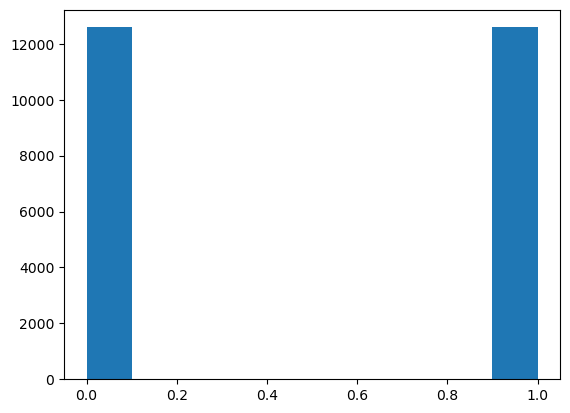

In [64]:
plt.hist(y_resampled.values)

In [65]:
X_resampled

,NUM_MATRICULAS,NUM_CURSOS_APR_CICLO_01,NUM_CURSOS_APR_CICLO_02,NUM_CURSOS_APR_CICLO_03,NUM_CURSOS_APR_CICLO_04,NUM_CURSOS_APR_CICLO_05,NUM_CURSOS_APR_CICLO_06,NUM_CURSOS_APR_CICLO_07,NUM_CURSOS_APR_CICLO_08,NUM_CURSOS_APR_CICLO_09,...,MODAL_INGRESO_TRASLADOS EXTERNOS,MODAL_INGRESO_TRASLADOS INTERNOS,MODAL_INGRESO_TRASLADOS INTERNOS EN FACULTAD,MODAL_INGRESO_sin especificar,TIPO_COLEGIO_,TIPO_COLEGIO_ESTATAL,TIPO_COLEGIO_PARTICULAR,SEXO_ESTUDIANTE_F,SEXO_ESTUDIANTE_M,PROCEDENCIA_Ciudadano
0,1,3,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,1,8,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
2,19,3,17,16,14,8,9,6,7,8,...,0,0,0,0,1,0,0,1,0,1
3,7,1,16,13,5,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
4,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25177,17,42,20,9,13,9,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1
25178,7,3,9,8,9,4,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
25179,15,2,13,6,5,4,5,4,7,7,...,0,0,0,0,1,0,0,0,0,0
25180,3,15,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [66]:
y_resampled

0        0
1        0
2        1
3        0
4        0
        ..
25177    1
25178    1
25179    1
25180    1
25181    1
Name: ABADONO, Length: 25182, dtype: int64